## 求解费米能级随温度变化的关系

### 大体思路为：
#### 1.先用初始的TDOS文件对应温度下的费米能级计算出一个N，求出这个N也就是求出了所有的N。
#### 2.改变温度，费米能级EF开始改变，这时用漫步迭代法来逐渐逼近真实值。
#### 3.当误差小于规定精度时，可以近似认为就是真实的费米能级。
#### 4.给出一组温度，求解它们对应的费米能级，并根据这些数据作图。

In [1]:
import math
import matplotlib
from matplotlib import pyplot as plt


filename = 'TDOS.dat'
Ef = 0.0
Kb = 1.380649*1e-23
ee = 1.6021766208*1e-19

N = 26.694986300000018  ##运用之前写的DOS脚本获取T=0时对应的N，N现如今为常数

#### 以上设置的是一些常数和默认的参数，其中N就是先前求出来的电子总数N

In [2]:
def getEF(T,filen,N,precison=1e-4):
    '''
    该函数用于获取随温度变化的费米能级EF
    T为温度
    filen为TDOS文件
    N为电子数
    默认精度为小数点后5位
    输出为费米能级EF
    '''
    ##首先要计算体系在T=0时的N来作为常数
    a = open(filen,'r')
    aa = a.readlines()
    dosall = []
    for i in range(1,len(aa)):
        dos = (aa[i]).split()
        dosall.append([float(dos[0]),float(dos[1])])

    ##定义计算N的函数
    def getdos(T,EE):
        '''
        该函数用于求解对应的N
        T为温度
        EE为费米能级
        '''
        def getfE(E,DOSE):
            '''
            该函数用于求解F（E）
            E为能量
            DOSE为态密度
            '''
            try:
                res1 = DOSE/(pow(math.e,(1/(Kb*T))*(E-EE)*ee)+1) 
            except:
                res1 = 0

            return res1
        
        res2 = 0
        for j in range(0,len(dosall)-1):
            h = dosall[j+1][0] - dosall[j][0]
            y = (getfE(dosall[j][0],dosall[j][1])+getfE(dosall[j][0],dosall[j][1]))/2
            res2 += h*y

        return res2
    
    ##设置初始迭代值和步长以及方向,取初始的费米能级大小
    initEF = Ef
    step = 1e-4
    dir = 1
    cur_EF = initEF
    pro_EF = initEF + step
    ##设置一个存储迭代值的列表以便跳出漫步迭代
    EEE = []
    while abs(getdos(T,pro_EF) - N) > precison:
        dis = abs(getdos(T,pro_EF) - N) - abs(getdos(T,cur_EF) - N)
        if dis > 0:
            dir = dir*(-1)
            cur_EF = cur_EF
            pro_EF = cur_EF + dir*step
        else:
            cur_EF = pro_EF
            pro_EF = cur_EF + dir*step
        if pro_EF not in EEE:
            EEE.append(pro_EF)
        ##当先前出现的迭代值再次出现时，说明漫步过程回头了，即找到了接近的精确值
        else:
            break
        
    return pro_EF

#### 主要的函数如上，包括迭代和回代求解验证

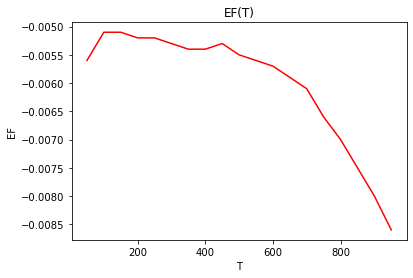

In [3]:
Ts = range(50,1000,50)
EFs = []
for i in range(len(Ts)):
    EFs.append(getEF(Ts[i],filename,N))

plt.plot(Ts,EFs,color='r')
plt.xlabel('T')
plt.ylabel('EF')
plt.title('EF(T)')
plt.show()

#### 以上的图像即反应了费米能级随温度变化的一个关系，可以虽然不是线性的，但是总体上一个随温度增大逐渐下降的趋势。